<a href="https://colab.research.google.com/github/ShivaniMohite1/CodeAlpha_Project_Name/blob/main/CodeAlpha_DS_intern_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CODEALPHA :- DATA SCIENCE INTERNSHIP -**

**Project 1 :- Titanic Survival Prediction**

**📚 Import Libraries :-**

**Pandas, NumPy** (Dataset Acquisition , Data Exploration and Preprocessing)

**Matplotlib, Seaborn** (Data Visualization, Model Interpretation)

**Scikit-Learn** (Data Splitting,Model Selection,Model Training,Model Evaluation, Model Interpretation)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

**Data Exploration**

In [ ]:
dataset = pd.read_csv('/content/Titanic Survival Dataset.csv')

In [ ]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
print(dataset.shape)

(418, 12)


In [ ]:
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [ ]:
dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


**📊 Data Analysis**

In this phase, we dive deeper into the dataset, perform various analyses, and prepare the data for modeling. Key tasks include data cleaning, encoding, and gaining insights through descriptive statistics and data visualization.

**Data Cleaning**

In [ ]:
dataset.drop(columns=['Cabin'],inplace=True)

In [ ]:
dataset['Fare'].fillna(dataset['Fare'].mean(),inplace=True)

In [ ]:
test_age = np.random.randint(dataset['Age'].mean() - dataset['Age'].std(), dataset['Age'].mean() + dataset['Age'].std(), 86)

In [ ]:
 dataset['Age'][dataset['Age'].isnull()] = test_age

<ipython-input-13-91190231e9e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][dataset['Age'].isnull()] = test_age


In [ ]:
dataset.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
#  embark null fix
data = [dataset]
for dataset in data:
    dataset.Embarked = dataset.Embarked.fillna('S')

**Data Encoding**

In [ ]:
dataset['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [ ]:
#now we need to convert sex into integer value
gendermap ={'male':0, 'female':1}
data = [dataset]
for dataset in data:
    dataset['Sex'] =  dataset['Sex'].map(gendermap)

In [ ]:
dataset['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
embarkmap={'C':0, 'Q':1 ,'S':2}
data = [dataset]
for dataset in data:
    dataset['Embarked'] =  dataset['Embarked'].map(embarkmap)

In [ ]:
dataset['Embarked'].value_counts()

2    270
0    102
1     46
Name: Embarked, dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB


In [ ]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Data Preprocessing**

In [ ]:
# Data preprocessing on the 'Fare' column
tempfare = dataset['Fare']
tempfare = pd.qcut(tempfare, 5)
tempfare.value_counts()

(-0.001, 7.796]     85
(11.342, 21.679]    85
(46.34, 512.329]    84
(7.796, 11.342]     82
(21.679, 46.34]     82
Name: Fare, dtype: int64

In [ ]:
data = [dataset]
for dataset in data:
    dataset.loc[dataset['Fare'] <= 7.796, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.796) & (dataset['Fare'] <= 11.342), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 11.342) & (dataset['Fare'] <= 21.679), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 46.34), 'Fare'] = 3
    dataset.loc[dataset['Fare'] > 46.34, 'Fare'] = 4

    dataset['Fare'] = dataset['Fare'].astype(int)

dataset['Fare'].value_counts()

0    85
3    84
4    84
2    83
1    82
Name: Fare, dtype: int64

In [ ]:
# Data preprocessing on the 'age' column
tempage = dataset['Age']
tempage = pd.qcut(tempage, 5)
tempage.value_counts()


(0.169, 21.0]    103
(26.0, 32.0]      83
(41.0, 76.0]      79
(32.0, 41.0]      78
(21.0, 26.0]      75
Name: Age, dtype: int64

In [ ]:
data = [dataset]
for dataset in data:
    dataset.loc[dataset['Age'] <= 21.0, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 21.0) & (dataset['Age'] <= 25.0), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 25.0) & (dataset['Age'] <= 31.0), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 31.0) & (dataset['Age'] <= 41.0), 'Age'] = 3
    dataset.loc[dataset['Age'] > 76.0, 'Age'] = 4

    dataset['Age'] = dataset['Age'].astype(int)

dataset['Age'].value_counts()

0     103
3      89
2      85
1      62
43     10
45      9
42      7
55      6
48      5
47      5
50      5
60      4
46      3
49      3
53      3
64      3
57      3
63      2
61      2
54      2
67      1
76      1
62      1
58      1
59      1
44      1
51      1
Name: Age, dtype: int64

In [ ]:
# 1.getting some statistic measure about the data
dataset.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.00000,418.000000
mean,1100.500000,0.363636,2.265550,0.363636,10.772727,0.447368,0.392344,2.00000,1.401914
std,120.810458,0.481622,0.841838,0.481622,19.593434,0.896760,0.981429,1.42098,0.854496
min,892.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.00000,1.000000
50%,1100.500000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,2.00000,2.000000
75%,1204.750000,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,3.00000,2.000000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,4.00000,2.000000


**Exploratory Data Analysis**

In [ ]:
dataset['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [ ]:
# Get the unique values in the 'Pclass' column (1, 2, and 3)
pclass_values = dataset['Pclass'].unique()

# Loop through each unique 'Pclass' value and calculate the percentage of passengers who survived
for pclass_value in pclass_values:
    subset_dataset = dataset[dataset['Pclass'] == pclass_value]
    percentage_survived = (subset_dataset['Survived'].sum() / len(subset_dataset)) * 100
    print(f"Percentage of passengers in class {pclass_value} who survived: {percentage_survived:.2f}%")

Percentage of passengers in class 3 who survived: 33.03%
Percentage of passengers in class 2 who survived: 32.26%
Percentage of passengers in class 1 who survived: 46.73%


In [ ]:
# Group the DataFrame by 'sex' and calculate the mean survival rate
survival_mean_by_sex = dataset.groupby(['Sex'])['Survived'].mean() * 100

for sex, percentage in survival_mean_by_sex.items():
    print(f"Percentage of passengers who survived in {sex}: {percentage:.2f}%")

Percentage of passengers who survived in 0: 0.00%
Percentage of passengers who survived in 1: 100.00%


In [ ]:
# Group the DataFrame by 'Embarked' and calculate the mean survival rate
survival_mean_by_Embarked = dataset.groupby(['Embarked'])['Survived'].mean() * 100

for embarked, percentage in survival_mean_by_Embarked.items():
    print(f"Percentage of passengers who survived in {embarked}: {percentage:.2f}%")

Percentage of passengers who survived in 0: 39.22%
Percentage of passengers who survived in 1: 52.17%
Percentage of passengers who survived in 2: 32.59%


In [ ]:
# Group the DataFrame by 'Name' and calculate the mean survival rate
survival_mean_by_name = dataset.groupby(['Name'])['Survived'].mean() * 100

for name, percentage in survival_mean_by_name.items():
    print(f"Percentage of passengers who survived in {name}: {percentage:.2f}%")

Percentage of passengers who survived in Abbott, Master. Eugene Joseph: 0.00%
Percentage of passengers who survived in Abelseth, Miss. Karen Marie: 100.00%
Percentage of passengers who survived in Abelseth, Mr. Olaus Jorgensen: 0.00%
Percentage of passengers who survived in Abrahamsson, Mr. Abraham August Johannes: 0.00%
Percentage of passengers who survived in Abrahim, Mrs. Joseph (Sophie Halaut Easu): 100.00%
Percentage of passengers who survived in Aks, Master. Philip Frank: 0.00%
Percentage of passengers who survived in Aldworth, Mr. Charles Augustus: 0.00%
Percentage of passengers who survived in Allison, Mr. Hudson Joshua Creighton: 0.00%
Percentage of passengers who survived in Andersen, Mr. Albert Karvin: 0.00%
Percentage of passengers who survived in Andersson, Miss. Ida Augusta Margareta: 100.00%
Percentage of passengers who survived in Andersson, Mr. Johan Samuel: 0.00%
Percentage of passengers who survived in Andrew, Mr. Frank Thomas: 0.00%
Percentage of passengers who surv

In [ ]:
# Group the DataFrame by 'SibSp' and calculate the mean survival rate
survival_mean_by_SibSp = dataset.groupby(['SibSp'])['Survived'].mean() * 100

for sibsp, percentage in survival_mean_by_SibSp.items():
    print(f"Percentage of passengers who survived in {sibsp}: {percentage:.2f}%")

Percentage of passengers who survived in 0: 31.10%
Percentage of passengers who survived in 1: 49.09%
Percentage of passengers who survived in 2: 42.86%
Percentage of passengers who survived in 3: 25.00%
Percentage of passengers who survived in 4: 25.00%
Percentage of passengers who survived in 5: 100.00%
Percentage of passengers who survived in 8: 50.00%


In [ ]:
# Group the DataFrame by 'Parch' and calculate the mean survival rate
survival_mean_by_Parch = dataset.groupby(['Parch'])['Survived'].mean() * 100

for parch, percentage in survival_mean_by_Parch.items():
    print(f"Percentage of passengers who survived in {parch}: {percentage:.2f}%")

Percentage of passengers who survived in 0: 30.56%
Percentage of passengers who survived in 1: 53.85%
Percentage of passengers who survived in 2: 60.61%
Percentage of passengers who survived in 3: 66.67%
Percentage of passengers who survived in 4: 100.00%
Percentage of passengers who survived in 5: 0.00%
Percentage of passengers who survived in 6: 0.00%
Percentage of passengers who survived in 9: 50.00%


In [ ]:
# Group the DataFrame by 'Embarked' and calculate the mean survival rate
survival_mean_by_Embarked = dataset.groupby(['Ticket'])['Survived'].mean() * 100

for embarked, percentage in survival_mean_by_Embarked.items():
    print(f"Percentage of passengers who survived in {embarked}: {percentage:.2f}%")

Percentage of passengers who survived in 110469: 0.00%
Percentage of passengers who survived in 110489: 0.00%
Percentage of passengers who survived in 110813: 0.00%
Percentage of passengers who survived in 111163: 0.00%
Percentage of passengers who survived in 112051: 0.00%
Percentage of passengers who survived in 112058: 0.00%
Percentage of passengers who survived in 112377: 100.00%
Percentage of passengers who survived in 112378: 100.00%
Percentage of passengers who survived in 112901: 100.00%
Percentage of passengers who survived in 113038: 0.00%
Percentage of passengers who survived in 113044: 0.00%
Percentage of passengers who survived in 113054: 0.00%
Percentage of passengers who survived in 113059: 0.00%
Percentage of passengers who survived in 113503: 50.00%
Percentage of passengers who survived in 113509: 100.00%
Percentage of passengers who survived in 113773: 100.00%
Percentage of passengers who survived in 113778: 0.00%
Percentage of passengers who survived in 113780: 0.00%

In [ ]:
# Group the DataFrame by 'Age' and calculate the mean survival rate
survival_mean_by_Age = dataset.groupby(['Age'])['Survived'].mean() * 100

for age, percentage in survival_mean_by_Age.items():
    print(f"Percentage of passengers who survived in {age}: {percentage:.2f}%")

Percentage of passengers who survived in 0: 38.83%
Percentage of passengers who survived in 1: 37.10%
Percentage of passengers who survived in 2: 35.29%
Percentage of passengers who survived in 3: 29.21%
Percentage of passengers who survived in 42: 0.00%
Percentage of passengers who survived in 43: 40.00%
Percentage of passengers who survived in 44: 0.00%
Percentage of passengers who survived in 45: 77.78%
Percentage of passengers who survived in 46: 0.00%
Percentage of passengers who survived in 47: 40.00%
Percentage of passengers who survived in 48: 80.00%
Percentage of passengers who survived in 49: 0.00%
Percentage of passengers who survived in 50: 20.00%
Percentage of passengers who survived in 51: 100.00%
Percentage of passengers who survived in 53: 33.33%
Percentage of passengers who survived in 54: 50.00%
Percentage of passengers who survived in 55: 50.00%
Percentage of passengers who survived in 57: 0.00%
Percentage of passengers who survived in 58: 100.00%
Percentage of passe

**Data Visualization**

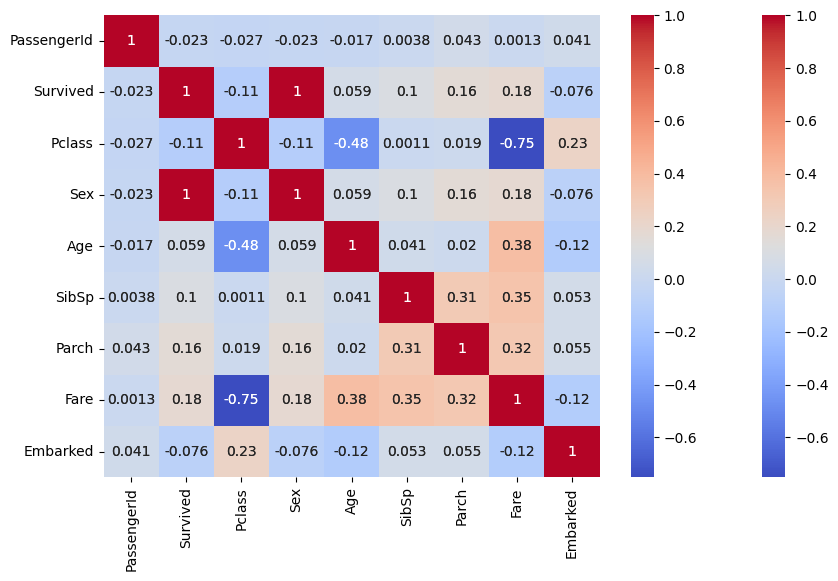

In [ ]:
plt.figure(figsize=[10, 6])  # Adjust the figure size as needed
sns.heatmap(dataset.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
sns.heatmap(dataset.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
sns.set()

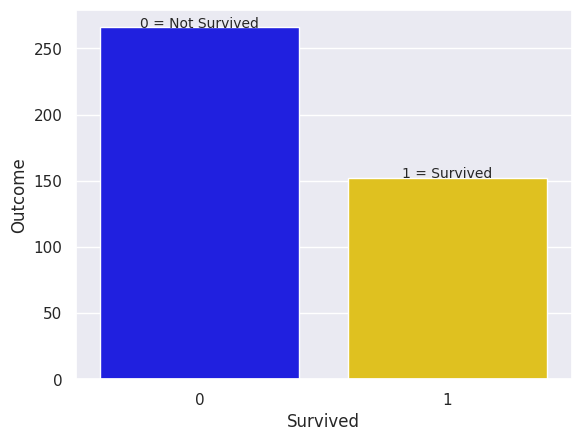

In [ ]:
custom_palette = {0: 'Blue', 1: 'Gold'}

sns.countplot(x='Survived', data=dataset, palette=custom_palette)

plt.xlabel('Survived')
plt.ylabel('Outcome')

plt.text(0, dataset['Survived'].value_counts()[0], '0 = Not Survived', ha='center' ,fontsize=10)
plt.text(1, dataset['Survived'].value_counts()[1], '1 = Survived', ha='center' ,fontsize=10)

plt.show()

<ipython-input-40-cbb6f15fd676>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Age'][dataset['Survived'] == 0], label="Not Survived" , color = 'Blue')
<ipython-input-40-cbb6f15fd676>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Age'][dataset['Survived'] == 1], label="Surv

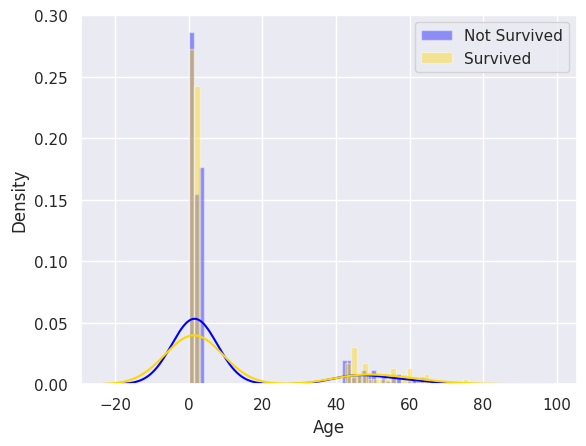

In [ ]:
# Distribution plot for 'Age'
sns.distplot(dataset['Age'][dataset['Survived'] == 0], label="Not Survived" , color = 'Blue')

sns.distplot(dataset['Age'][dataset['Survived'] == 1], label="Survived" ,  color = 'Gold')

plt.xlabel('Age')
plt.ylabel('Density')

plt.legend()
plt.show()

<ipython-input-41-3556c237e8fd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Pclass'][dataset['Survived'] == 0], label="Not Survived" , color = 'Blue')
<ipython-input-41-3556c237e8fd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Pclass'][dataset['Survived'] == 1], label

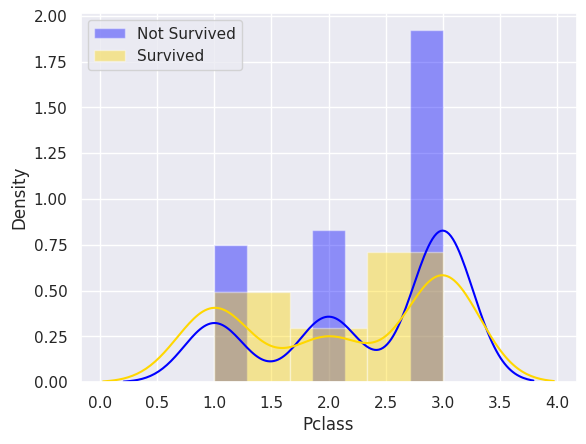

In [ ]:
#Distribution plot for 'Pclass'
sns.distplot(dataset['Pclass'][dataset['Survived'] == 0], label="Not Survived" , color = 'Blue')

sns.distplot(dataset['Pclass'][dataset['Survived'] == 1], label="Survived" ,  color = 'Gold')

plt.xlabel('Pclass')
plt.ylabel('Density')

plt.legend()

plt.show()

<ipython-input-42-f75af22e5653>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['SibSp'][dataset['Survived'] == 0], label="Not Survived" , color = 'Blue')
<ipython-input-42-f75af22e5653>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['SibSp'][dataset['Survived'] == 1], label="

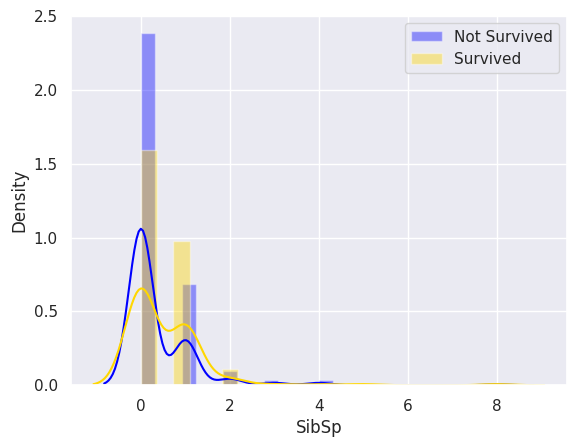

In [ ]:
# Distribution plot for 'SibSp'
sns.distplot(dataset['SibSp'][dataset['Survived'] == 0], label="Not Survived" , color = 'Blue')

sns.distplot(dataset['SibSp'][dataset['Survived'] == 1], label="Survived" ,  color = 'Gold')

plt.xlabel('SibSp')
plt.ylabel('Density')

plt.legend()

plt.show()

<ipython-input-43-755c7b1cdd63>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Fare'][dataset['Survived'] == 0], label="Not Survived" , color = 'Blue')
<ipython-input-43-755c7b1cdd63>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Fare'][dataset['Survived'] == 1], label="Su

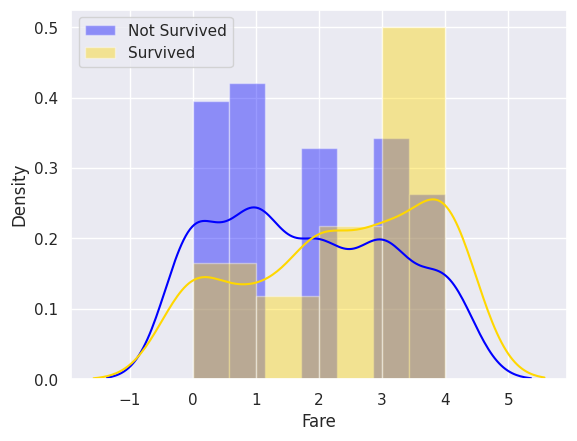

In [ ]:
# Distribution plot for 'Fare'
sns.distplot(dataset['Fare'][dataset['Survived'] == 0], label="Not Survived" , color = 'Blue')

# Create a distribution plot for 'Age' when 'Survived' is 1 and label it as "Survived"
sns.distplot(dataset['Fare'][dataset['Survived'] == 1], label="Survived" ,  color = 'Gold')

# Add labels to the x and y axes
plt.xlabel('Fare')
plt.ylabel('Density')  # You can change this label as needed

# Add a legend to differentiate between "Not Survived" and "Survived"
plt.legend()

# Show the plots
plt.show()


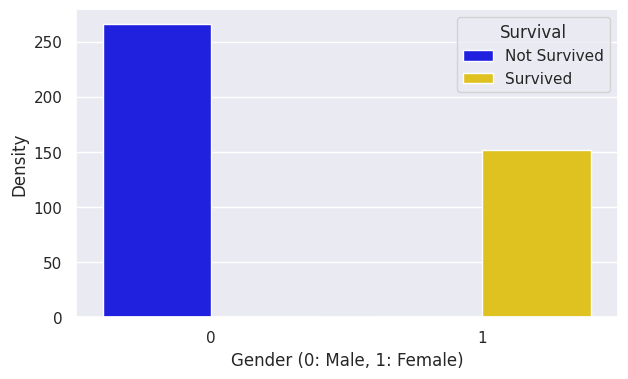

In [ ]:
# Count plot for 'Sex'
plt.figure(figsize=(7, 4))
custom_palette = {0: "Blue", 1: "Gold"}
sns.countplot(x='Sex', hue='Survived', data=dataset, palette=custom_palette)

plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Density')

plt.legend(title='Survival', labels=['Not Survived', 'Survived'])

plt.show()

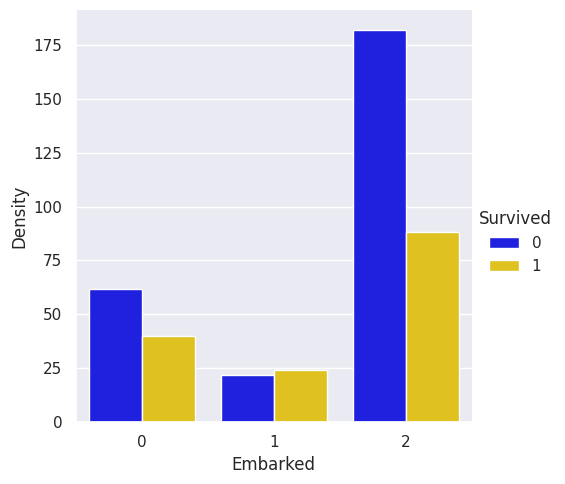

In [ ]:
#Categorical plot (catplot) for 'Embarked' vs. 'Survived'
g = sns.catplot(data=dataset, x='Embarked', hue='Survived', kind='count', palette={0: 'Blue', 1: 'Gold'})

g.set_axis_labels('Embarked', 'Density')
plt.show()

**Drop Unnecessary Columns**

In [ ]:
dataset.drop(columns=['Name'],inplace=True)

In [ ]:
dataset.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,0,3,0,0,330911,1,1
1,893,1,3,1,47,1,0,363272,0,2


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Survived     418 non-null    int64 
 2   Pclass       418 non-null    int64 
 3   Sex          418 non-null    int64 
 4   Age          418 non-null    int64 
 5   SibSp        418 non-null    int64 
 6   Parch        418 non-null    int64 
 7   Ticket       418 non-null    object
 8   Fare         418 non-null    int64 
 9   Embarked     418 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 32.8+ KB


In [ ]:
 dataset.isnull()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,False,False,False,False,False
414,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False
416,False,False,False,False,False,False,False,False,False,False


**Data Splitting**

In [ ]:
X_train = dataset.drop(['Survived', 'PassengerId'], axis=1)
Y_train = dataset['Survived']

In [ ]:
X_test =dataset.drop(['PassengerId' , 'Survived'] , axis = 1)

** Model Building**

Predicting Titanic survival is a classic Binary Classification problem where the goal is to determine whether a passenger survived (1) or did not survive (0) based on various features.Several machine learning models can be used for this task, including Logistic regression,SVM,KNN classifier,Gaussian Naive Bayes,Ridge Classifier.

In [ ]:
# Create an Logistic Classifier
logistic_classifier = LogisticRegression(random_state=0)
logistic_classifier.fit(X_train, Y_train)
accuracy = logistic_classifier.score(X_train, Y_train)
acc = round(accuracy * 100, 2)
print("Logistic Classifier Accuracy:" , acc,"%")


In [ ]:
print('Logistic Classifier Accuracy: 100.0 %')

Logistic Classifier Accuracy: 100.0 %


In [ ]:
# Create an SVM classifier
svc_classifier = SVC()

# Fit the classifier to your training data
svc_classifier.fit(X_train, Y_train)
svcacc= svc_classifier.score(X_train, Y_train)
accuracy_svm = round(svcacc * 100, 2)
print("SVM Classifier Accuracy:", accuracy_svm,"%")

In [ ]:
print('SVM Classifier Accuracy: 63.64 %')

SVM Classifier Accuracy: 63.64 %


In [ ]:
# Create a Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, Y_train)
gnb_acc = gnb_classifier.score(X_train, Y_train)
accuracy_gnb = round(gnb_acc * 100, 2)

print("Gaussian Naive Bayes Classifier Accuracy:", accuracy_gnb,"%")

In [ ]:
print('Gaussian Naive Bayes Classifier Accuracy: 100.0 %')

Gaussian Naive Bayes Classifier Accuracy: 100.0 %


In [ ]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, Y_train)
knn_acc = knn_classifier.score(X_train, Y_train)
accuracy_knn = round(knn_acc * 100, 2)

print("K-Nearest Neighbors Classifier Accuracy:", accuracy_knn,"%")


In [ ]:
print('K-Nearest Neighbors Classifier Accuracy: 93.78 %')

K-Nearest Neighbors Classifier Accuracy: 93.78 %


**Thank You**